Importamos las funciones requeridas.

In [2]:
import sys
import os
from math import sin, cos, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from generator import generate
from runner import correr_instancia
from isotherm import isotherm_abs, isotherm_lin, isotherm_lin2
from risk import run_risks
from graph  import read_input, temp_graph, temp_graph_bilin, iso_graph, risk_graph

Experimento 4.3.1 $EG$ vs $LU$ con número de instancias creciente.

Generamos las instancias

In [ ]:
max_ninst = 100

distribuciones = ['uniforme', 'picos', 'normal']
Te = {
    'uniforme': lambda t : 0,
    'picos'   : lambda t : ((((sin(t)+1)/2)**( (10) *5+1))*500),
    'normal'  : lambda t : np.random.normal(250, 125)
}

for i in range(len(distribuciones)):
    instancia = f'{distribuciones[i]}/instancias'
    for ninst in range(1, max_ninst+1):
        generate(instancia, f"{distribuciones[i]}_{ninst}", 1, 2, 30, 30, 500, ninst, [lambda t : 1500]*ninst, [Te[distribuciones[i]]]*ninst)

Resolvemos las instancias

In [ ]:
distribucion = 'normal'
instancia = f'{distribucion}/instancias'
path_tiempos = f"../../output/{instancia}/"
for ninst in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    runs = 60-ninst
    if (os.path.isfile(path_tiempos+f"normal_{ninst}_EG.time")):
        open(path_tiempos+f"normal_{ninst}_EG.time", "w").close()
    if (os.path.isfile(path_tiempos+f"normal_{ninst}_LU.time")):
        open(path_tiempos+f"normal_{ninst}_LU.time", "w").close()
    for j in range(runs):
        correr_instancia('temperatura', instancia, f'normal_{ninst}', 'EG')
        correr_instancia('temperatura', instancia, f'normal_{ninst}', 'LU')

Graficamos

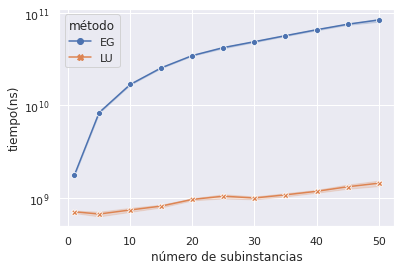

In [4]:
distribucion = 'normal'
instancia = f'{distribucion}/instancias'
path_tiempos = f"../../output/{instancia}/"
datapoints = []
eg = pd.DataFrame([])  
for ninst in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    n_eg = pd.read_csv(path_tiempos+f'{distribucion}_{ninst}_EG.time')
    n_eg = n_eg.groupby(n_eg.index // ninst).sum()
    n_eg['ninst'] = [ninst]*len(n_eg)
    eg = pd.concat([eg, n_eg], axis=0).drop_duplicates().reset_index(drop=True)
eg = eg.rename(columns={'EG': 'time'})
eg['método'] = ['EG']*len(eg)

lu = pd.DataFrame([])  
for ninst in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    n_lu = pd.read_csv(path_tiempos+f'{distribucion}_{ninst}_LU.time')
    n_lu = n_lu.groupby(n_lu.index // ninst).sum()
    n_lu['ninst'] = [ninst]*len(n_lu)
    lu = pd.concat([lu, n_lu], axis=0).drop_duplicates().reset_index(drop=True)
lu = lu.rename(columns={'LU': 'time'})
lu['método'] = ['LU']*len(lu)

times = pd.concat([eg, lu], axis=0).drop_duplicates().reset_index(drop=True)

sns.set_theme()
ax = sns.lineplot(
    data=times,
    x='ninst', y='time', hue='método', style='método',
    markers=True, dashes=False
)
ax.set(xlabel='número de subinstancias', ylabel='tiempo(ns)')
plt.yscale('log')
plt.savefig('EG_vs_LU_ninst.pdf')

In [ ]:

temp_graph('normal/instancias', 'normal_3')
temp_graph_bilin('normal/instancias', 'normal_3')